In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [3]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
#pandas_profiling.ProfileReport(data)`

In [8]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


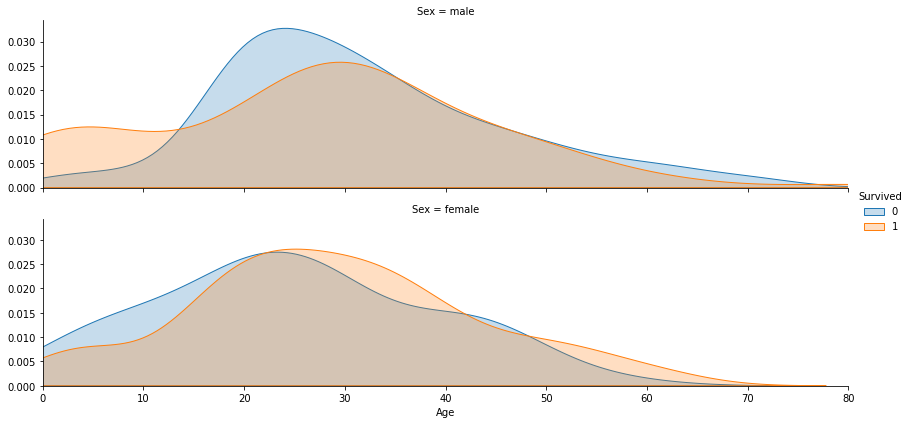

In [12]:
facet = sns.FacetGrid(data, hue='Survived', aspect=4, row = 'Sex')
facet.map(sns.kdeplot, 'Age', shade= True )
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()

<AxesSubplot:>

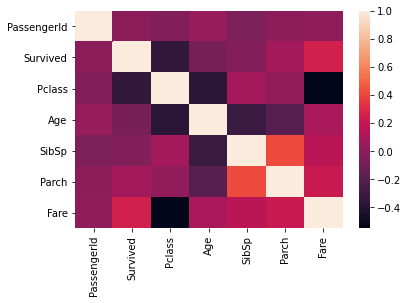

In [14]:
sns.heatmap(data.corr())

In [18]:
y = data['Survived']
data = data.drop(['Survived'],axis =1)

In [19]:
class UnCanged(BaseEstimator, TransformerMixin):
    """return unchanged data"""
    def fit(*args, **kwargs):
        return
    def fit_transform(self, x, *args):
        return self.transform(x)

    def transform(self, x):
        return x

In [20]:
class MakeTitle(BaseEstimator, TransformerMixin):
    """extracts the title from the name"""
    def fit(*args, **kwargs):
        return

    def fit_transform(self, x, *args):
        return self.transform(x)

    def transform(self, x):
        title = x['Name'].str.extract('([A-Za-z]+)\.',expand = False)
        title = title.replace(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Col', 'Major',\
                                             'Mlle', 'Countess', 'Capt', 'Mme', 'Ms', 'Sir', 'Don', 'Jonkheer','Lady', 'Dona'],
                                           ['Mr', 'Miss', 'Mrs', 'Master','Dr','Other', 'Other','Other', 'Other',\
                                            'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'])
        return title.values.reshape(-1,1)    

In [21]:
process_embarked = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label_encoder', OrdinalEncoder())
])

In [22]:
process_title = Pipeline(steps=[
    ('title_extract', MakeTitle()),
    ('label_encoder', OrdinalEncoder())
])

In [23]:
preprocess = ColumnTransformer(
    transformers=[
        ('title', process_title, ['Name']),
        ('sex', OrdinalEncoder(), ['Sex']),
        ('num', SimpleImputer(), ['Age', 'Fare']),
        ('embarked', process_embarked, ['Embarked']),
        ('unmodified', UnCanged(), ['Parch', 'SibSp', 'Pclass'])     
    ],remainder='drop')

In [24]:
from xgboost import XGBRFClassifier, XGBClassifier

Split data

In [25]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=1, test_size= 0.2)

Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf_parms = {'classifier__n_estimators': [10, 100, 200, 300, 400, 500, 1000],
                     'classifier__max_depth':[3, 4, 7, 10],
                     'classifier__min_samples_split': [3, 5, 7, 10],
                     'classifier__min_samples_leaf': [2, 3, 5,7]}

In [38]:
rf_pipeline = GridSearchCV(Pipeline(steps=[
        ('preprocessor', preprocess),
        ('classifier', RandomForestClassifier())
    ]), rf_parms, cv=KFold(), n_jobs=-1)

In [39]:
rf_pipeline.fit(X_train, y = y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('title',
                                                                         Pipeline(steps=[('title_extract',
                                                                                          MakeTitle()),
                                                                                         ('label_encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['Name']),
                                                                        ('sex',
                                                                         OrdinalEncoder(),
                                                                         ['Sex']),
                          

In [42]:
rf_pipeline.score(X_train, y_train)

0.8693820224719101

In [43]:
rf_pipeline.score(X_test, y_test)

0.7821229050279329

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<AxesSubplot:>

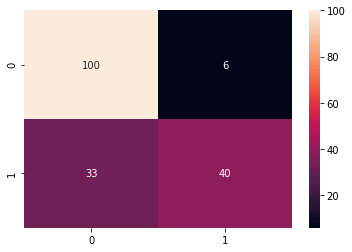

In [80]:
y_pred_rf = rf_pipeline.predict(X_test)
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,fmt="d")

In [91]:
class_report = classification_report(y_test,y_pred_rf, output_dict=True)
report_rf = pd.DataFrame(class_report).transpose()
report_rf

,precision,recall,f1-score,support
0,0.751880,0.943396,0.836820,106.000000
1,0.869565,0.547945,0.672269,73.000000
accuracy,0.782123,0.782123,0.782123,0.782123
macro avg,0.810722,0.745671,0.754544,179.000000
weighted avg,0.799874,0.782123,0.769713,179.000000


In [85]:
rf_pipeline.best_params_

{'classifier__max_depth': 4,
 'classifier__min_samples_leaf': 5,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 10}

XGBClassifier

In [44]:
xgb_params = {'classifier__n_estimators': [100,200,2000],
              'classifier__max_depth':[3,4],
             'classifier__gamma': [0.7,0.8,0.9],
             'classifier__min_child_weight': [2],
             'classifier__subsample': [0.8],
             'classifier__colsample_bytree': [0.8],
             'classifier__objective': ['binary:logistic'],
             'classifier__nthread': [-1],
             'classifier__scale_pos_weight': [1]}

In [45]:
xgb_pipeline = GridSearchCV(Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', XGBClassifier(use_label_encoder=False))
]), xgb_params, cv = KFold(), n_jobs = -1)

In [46]:
xgb_pipeline.fit(X_train,y = y_train)

[21:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('title',
                                                                         Pipeline(steps=[('title_extract',
                                                                                          MakeTitle()),
                                                                                         ('label_encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['Name']),
                                                                        ('sex',
                                                                         OrdinalEncoder(),
                                                                         ['Sex']),
                            

In [47]:
xgb_pipeline.score(X_test,y_test)

0.776536312849162

In [48]:
xgb_pipeline.best_params_

{'classifier__colsample_bytree': 0.8,
 'classifier__gamma': 0.8,
 'classifier__max_depth': 4,
 'classifier__min_child_weight': 2,
 'classifier__n_estimators': 100,
 'classifier__nthread': -1,
 'classifier__objective': 'binary:logistic',
 'classifier__scale_pos_weight': 1,
 'classifier__subsample': 0.8}

<AxesSubplot:>

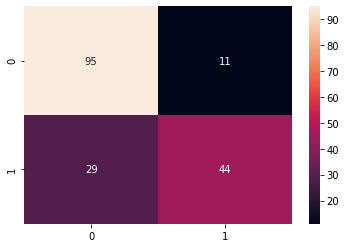

In [71]:

y_pred_xgb = xgb_pipeline.predict(X_test)
cm = confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(cm,annot=True,fmt="d")

In [90]:
class_report = classification_report(y_test,y_pred_xgb, output_dict=True)
report_xgb = pd.DataFrame(class_report).transpose()
report_xgb

,precision,recall,f1-score,support
0,0.766129,0.896226,0.826087,106.000000
1,0.800000,0.602740,0.687500,73.000000
accuracy,0.776536,0.776536,0.776536,0.776536
macro avg,0.783065,0.749483,0.756793,179.000000
weighted avg,0.779942,0.776536,0.769568,179.000000


CatBoostClassifier

In [26]:
params = {'classifier__depth':[3,4],
              'classifier__iterations':[250,100],
              'classifier__learning_rate':[0.03,0.001],
              'classifier__l2_leaf_reg':[3,1,5],
              'classifier__border_count':[5,10,20],
              'classifier__bagging_temperature':[0.03,0.09,0.25],
              'classifier__random_strength':[0.2,0.5],
              'classifier__max_ctr_complexity':[1,2,3] }

cat_pipeline = GridSearchCV(Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', CatBoostClassifier())
]), params, cv = KFold(), n_jobs = -1)

In [27]:
cat_pipeline.fit(X_train, y_train);

0:	learn: 0.6924094	total: 146ms	remaining: 36.3s
1:	learn: 0.6916571	total: 148ms	remaining: 18.3s
2:	learn: 0.6909432	total: 150ms	remaining: 12.3s
3:	learn: 0.6902096	total: 151ms	remaining: 9.3s
4:	learn: 0.6894860	total: 153ms	remaining: 7.47s
5:	learn: 0.6887558	total: 154ms	remaining: 6.27s
6:	learn: 0.6879686	total: 156ms	remaining: 5.4s
7:	learn: 0.6872499	total: 157ms	remaining: 4.75s
8:	learn: 0.6864297	total: 158ms	remaining: 4.24s
9:	learn: 0.6856117	total: 160ms	remaining: 3.84s
10:	learn: 0.6847960	total: 162ms	remaining: 3.51s
11:	learn: 0.6840719	total: 163ms	remaining: 3.23s
12:	learn: 0.6833866	total: 164ms	remaining: 3s
13:	learn: 0.6826290	total: 166ms	remaining: 2.79s
14:	learn: 0.6819334	total: 167ms	remaining: 2.62s
15:	learn: 0.6812256	total: 168ms	remaining: 2.46s
16:	learn: 0.6805001	total: 170ms	remaining: 2.32s
17:	learn: 0.6797909	total: 171ms	remaining: 2.2s
18:	learn: 0.6790689	total: 172ms	remaining: 2.09s
19:	learn: 0.6783732	total: 174ms	remaining: 2s

228:	learn: 0.5600966	total: 467ms	remaining: 42.8ms
229:	learn: 0.5596837	total: 468ms	remaining: 40.7ms
230:	learn: 0.5592597	total: 470ms	remaining: 38.6ms
231:	learn: 0.5588488	total: 471ms	remaining: 36.5ms
232:	learn: 0.5584181	total: 472ms	remaining: 34.5ms
233:	learn: 0.5580208	total: 473ms	remaining: 32.4ms
234:	learn: 0.5575604	total: 475ms	remaining: 30.3ms
235:	learn: 0.5571013	total: 476ms	remaining: 28.3ms
236:	learn: 0.5566748	total: 478ms	remaining: 26.2ms
237:	learn: 0.5562551	total: 479ms	remaining: 24.2ms
238:	learn: 0.5558287	total: 480ms	remaining: 22.1ms
239:	learn: 0.5554100	total: 481ms	remaining: 20.1ms
240:	learn: 0.5549876	total: 482ms	remaining: 18ms
241:	learn: 0.5545644	total: 484ms	remaining: 16ms
242:	learn: 0.5541578	total: 485ms	remaining: 14ms
243:	learn: 0.5537386	total: 486ms	remaining: 12ms
244:	learn: 0.5532790	total: 488ms	remaining: 9.96ms
245:	learn: 0.5528490	total: 489ms	remaining: 7.95ms
246:	learn: 0.5524310	total: 490ms	remaining: 5.95ms
2

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('title',
                                                                         Pipeline(steps=[('title_extract',
                                                                                          MakeTitle()),
                                                                                         ('label_encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['Name']),
                                                                        ('sex',
                                                                         OrdinalEncoder(),
                                                                         ['Sex']),
                            

In [28]:
cat_pipeline.score(X_train, y_train)

0.8547904191616766

In [29]:
cat_pipeline.score(X_test, y_test)

0.7892376681614349

Scale data

In [52]:
process_embarked = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label_encoder', OrdinalEncoder()),
    ('std_scaler', StandardScaler())
])

In [53]:
process_title = Pipeline(steps=[
    ('title_extract', MakeTitle()),
    ('label_encoder', OrdinalEncoder()),
    ('std_scale', StandardScaler(with_mean=False))
])

In [54]:
process_unchaged = Pipeline(steps=[
    ('std_scaler', StandardScaler(with_mean=False))
])

In [55]:
process_impute = Pipeline(steps=[
    ('num', SimpleImputer()),
    ('std_scale', StandardScaler(with_mean=False))
])

In [56]:
prepocess_scale = ColumnTransformer(
    transformers=[
        
        ('title', process_title, ['Name']),
        ('sex', OrdinalEncoder(), ['Sex']),
        ('num', process_impute, ['Age', 'Fare']),
        ('embarked', process_embarked, ['Embarked']),
        ('unmodified', process_unchaged, ['Parch', 'SibSp', 'Pclass'])     
    ],remainder='drop')

In [57]:
data_transformed_scale = prepocess_scale.fit_transform(data)
data_transformed_scale = pd.DataFrame(data_transformed_scale)
data_transformed_scale

,0,1,2,3,4,5,6,7
0,3.673083,1.0,1.692996,0.145976,0.585954,0.000000,0.907339,3.590226
1,4.897444,0.0,2.924265,1.435267,-1.942303,0.000000,0.907339,1.196742
2,2.448722,0.0,2.000813,0.159567,0.585954,0.000000,0.000000,3.590226
3,4.897444,0.0,2.693402,1.069152,0.585954,0.000000,0.907339,1.196742
4,3.673083,1.0,2.693402,0.162084,0.585954,0.000000,0.000000,3.590226
...,...,...,...,...,...,...,...,...
886,6.121805,1.0,2.077767,0.261751,0.585954,0.000000,0.000000,2.393484
887,2.448722,0.0,1.462133,0.604041,0.585954,0.000000,0.000000,1.196742
888,2.448722,0.0,2.285476,0.472158,0.585954,2.482607,0.907339,3.590226
889,3.673083,1.0,2.000813,0.604041,-1.942303,0.000000,0.000000,1.196742


LogisticRegression

In [58]:
linear_model = Pipeline(steps=[
    ('Preprocessor', prepocess_scale),
    ('model', GridSearchCV(
    LogisticRegression(random_state=42,penalty = 'l2'),
    param_grid = {'C': [0.1, 0.2, 0.3, 0.5, 1.0]},
    cv=KFold(),
    verbose=2))
])

In [59]:
linear_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.3; total time=   0.0s
[CV] END ........................................

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('title',
                                                  Pipeline(steps=[('title_extract',
                                                                   MakeTitle()),
                                                                  ('label_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('std_scale',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['Name']),
                                                 ('sex', OrdinalEncoder(),
                                                  ['Sex']),
                                                 ('num',
                                                  Pipeline(steps=[('num',
                                                               

In [60]:
linear_model.score(X_train,y_train)

0.8103932584269663

In [61]:
linear_model.score(X_test, y_test)

0.7877094972067039

<AxesSubplot:>

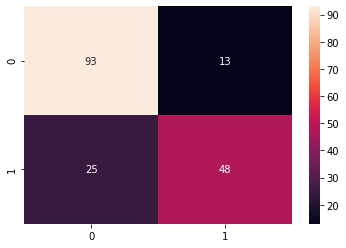

In [62]:
y_pred_linear = linear_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred_linear)
sns.heatmap(cm,annot=True,fmt="d")

In [89]:
class_report = classification_report(y_test,y_pred_linear, output_dict=True)
report_linear = pd.DataFrame(class_report).transpose()
report_linear

,precision,recall,f1-score,support
0,0.788136,0.877358,0.830357,106.000000
1,0.786885,0.657534,0.716418,73.000000
accuracy,0.787709,0.787709,0.787709,0.787709
macro avg,0.787510,0.767446,0.773388,179.000000
weighted avg,0.787626,0.787709,0.783890,179.000000


SVC

In [64]:
from sklearn import svm

In [65]:
svm_pipeline = Pipeline(steps=[
    ('preprocess', prepocess_scale),
    ('model', svm.SVC())
])

In [66]:
svm_pipeline.fit(X_train,y_train);

In [67]:
svm_pipeline.score(X_train, y_train)


0.8412921348314607

In [68]:
svm_pipeline.score(X_test, y_test)

0.7988826815642458

<AxesSubplot:>

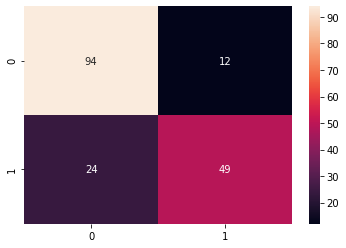

In [69]:
y_pred_svm = svm_pipeline.predict(X_test)
cm = confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm,annot=True,fmt="d")

In [88]:
class_report = classification_report(y_test,y_pred_svm, output_dict=True)
report_svm = pd.DataFrame(class_report).transpose()
report_svm

,precision,recall,f1-score,support
0,0.796610,0.886792,0.839286,106.000000
1,0.803279,0.671233,0.731343,73.000000
accuracy,0.798883,0.798883,0.798883,0.798883
macro avg,0.799944,0.779013,0.785314,179.000000
weighted avg,0.799330,0.798883,0.795264,179.000000
